# Testing Quantum Phase Kickback

In [1]:
# Libraries for creation of circuits and simulation
from qiskit import QuantumCircuit, BasicAer, transpile
from qiskit.tools.visualization import plot_histogram
from pprint import pprint


def simulate(my_circuit, print_distribution=False, SaveFileName : None = None ):
    simulator = BasicAer.get_backend('qasm_simulator')
    tqc = transpile(my_circuit, simulator)
    simulated_result = simulator.run(tqc).result()
    
    result_distribution = simulated_result.get_counts()
    if print_distribution:
        pprint(result_distribution)
    
    sim_histogram = plot_histogram(result_distribution)
    
    if SaveFileName:
        sim_histogram.savefig(SaveFileName)

    return result_distribution, sim_histogram

In [2]:
# Libraries for running over the real quantum computer
from qiskit_ibm_provider import IBMProvider
from qiskit.tools.monitor import job_monitor

In [3]:
# creating 2 circuits

# Plan: For circuit a
# First put two qubits in the superposition state
# Then measure them to force them into a state
# And then do the cnots with them. And see the results

# Plan: For circuit b
# First put them yet again in super position state, and force them to a state
# This time, hadamard the input, then do the same operation, and hadamard back
# See the role of the bits flip

# Circuit A
circuit_a = QuantumCircuit(2)

circuit_a.h((0,1))        # superposition
circuit_a.measure_all()   # Forcing a state
circuit_a.cx(0, 1)        # Operation
circuit_a.measure_all()   # Outputs

# Circuit B
circuit_b = QuantumCircuit(2)

circuit_b.h((0,1))        # superposition
circuit_b.measure_all()   # Forcing a state
circuit_b.h((0,1))        # Hadamarding
circuit_b.cx(0, 1)        # Operation
circuit_b.h((0,1))        # Hadamarding
circuit_b.measure_all()   # Outputs

plot_circuit_a = circuit_a.draw(output='mpl', style='iqp-dark') # draw the circuit
plot_circuit_b = circuit_b.draw(output='mpl', style='iqp-dark') # draw the circuit

plot_circuit_a.savefig('Normal circuit.png')
plot_circuit_b.savefig('Circuit for Quantum Phase Kickback.png')
# Expectations:
# First circuit will print the outputs for normal operations of CX gates for normal values of the Qubits
# Second Circuit will reverse the roles of bits, provide similar outputs, but for inputs as if the bits were reversed

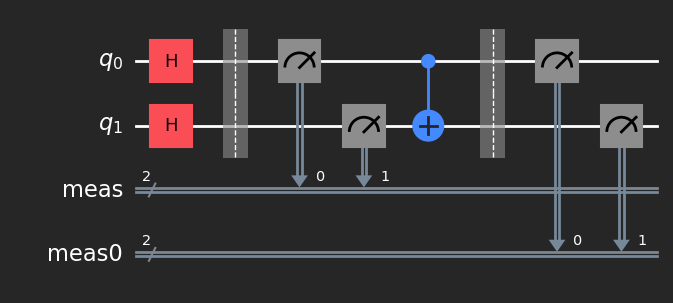

In [4]:
plot_circuit_a

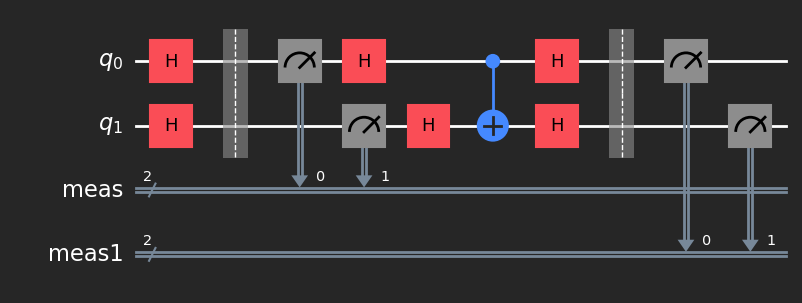

In [5]:
plot_circuit_b

## Simulation of the circuit

{'00 00': 263, '01 11': 249, '10 10': 264, '11 01': 248}


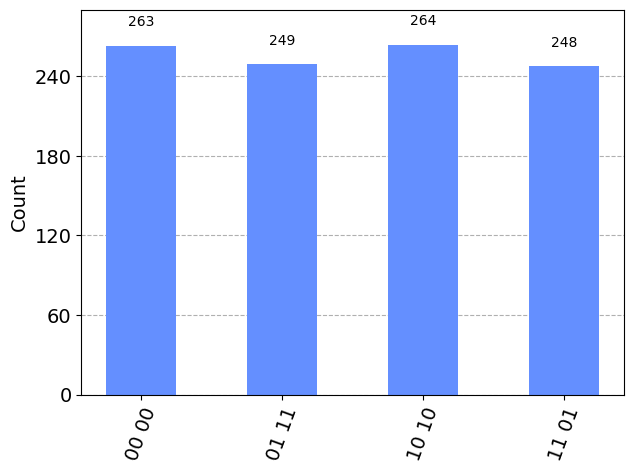

In [8]:
# simulating the circuit a
result_a, histogram_a = simulate(circuit_a, False, "Simulation a.png")
# to save it to a file:
# simulate(circuit, False, "filename.png")
pprint(result_a)
histogram_a

{'00 00': 244, '01 01': 251, '10 11': 252, '11 10': 277}


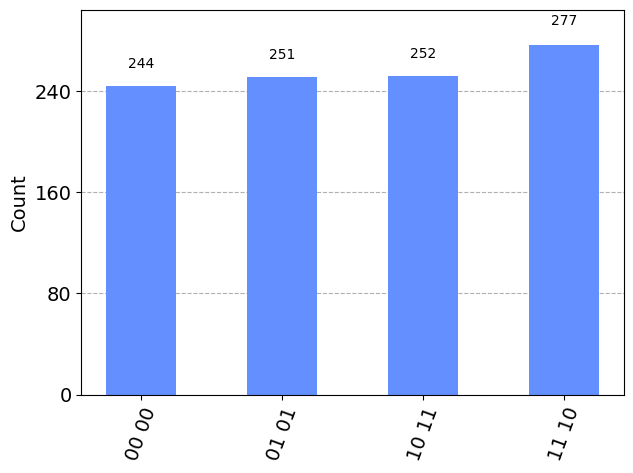

In [9]:
# simulating the circuit b
result_b, histogram_b = simulate(circuit_b, False, 'Simulation b.png')
# to save it to a file:
# simulate(circuit, False, "filename.png")
pprint(result_b)
histogram_b

## Running in actual Quantum Computer

In [11]:
# creating the provider object
provider = IBMProvider()

In [12]:
# seeing the available backends
pprint(provider.backends())

[<IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyoto')>,
 <IBMBackend('ibm_osaka')>,
 <IBMBackend('ibmq_qasm_simulator')>]


In [13]:
# selecting a quantum computer
qcomp1 = provider.get_backend('ibm_osaka')
qcomp2 = provider.get_backend('ibm_osaka')

In [14]:
# executing the circuit in the real quantum computer
tqc_real_quantum1 = transpile(circuit_a, qcomp1)
job1 = qcomp1.run(tqc_real_quantum1)

tqc_real_quantum2 =transpile(circuit_b, qcomp2)
job2 = qcomp2.run(tqc_real_quantum2)

In [17]:
job_monitor(job1)
job_monitor(job2)

Job Status: job has successfully run
Job Status: job has successfully run


In [18]:
quantum_result_a = job1.result()
quantum_result_counts_a = quantum_result_a.get_counts()
print(quantum_result_counts_a)

{'01 00': 26, '10 11': 36, '10 10': 925, '11 10': 35, '00 10': 29, '00 01': 29, '01 01': 17, '11 11': 19, '01 11': 857, '00 00': 914, '10 01': 49, '10 00': 19, '11 00': 37, '11 01': 930, '01 10': 41, '00 11': 37}


In [19]:
quantum_result_b = job2.result()
quantum_result_counts_b = quantum_result_b.get_counts()
print(quantum_result_counts_b)

{'00 00': 895, '00 10': 12, '00 01': 67, '10 11': 949, '11 00': 8, '00 11': 12, '11 11': 70, '11 01': 2, '01 11': 12, '01 00': 63, '11 10': 882, '10 10': 72, '10 01': 11, '10 00': 8, '01 10': 12, '01 01': 925}


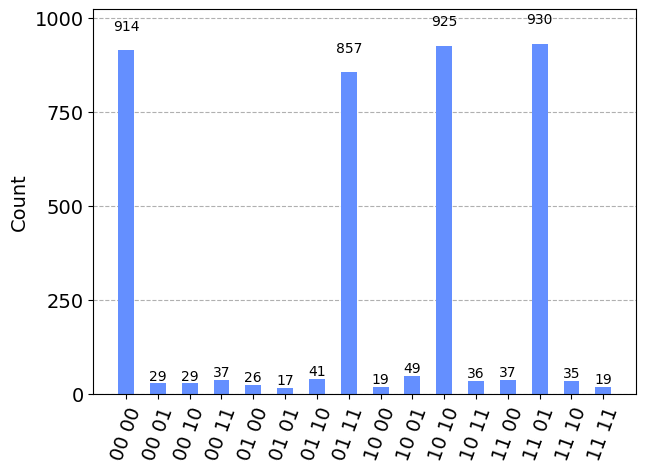

In [20]:
quantum_hist_a = plot_histogram(quantum_result_counts_a)
quantum_hist_a.savefig('quantum_result_circuit_a.png')
quantum_hist_a

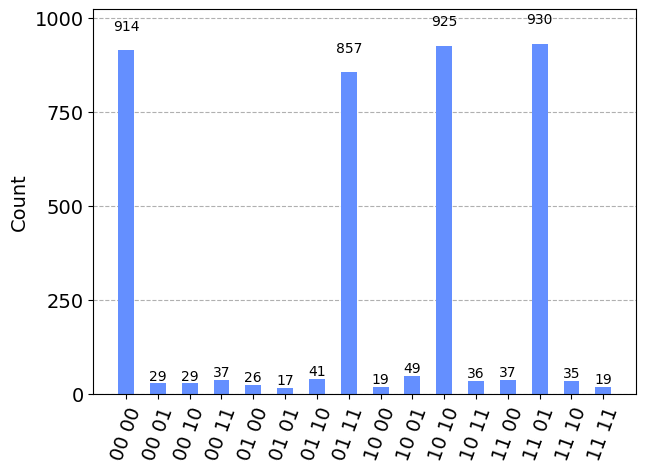

In [21]:

quantum_hist_b = plot_histogram(quantum_result_counts_a)
quantum_hist_b.savefig('quantum_result_circuit_b.png')
quantum_hist_b

In [23]:
# filter the results
def filter(quantum_result_counts, threshold = 250):
    threshold = 270
    filtered_quantum_result = {
        bits:count for bits,count in quantum_result_counts.items()
        if count > threshold
    }
    return filtered_quantum_result

filtered_result_a = filter(quantum_result_counts_a)
filtered_result_b = filter(quantum_result_counts_b)

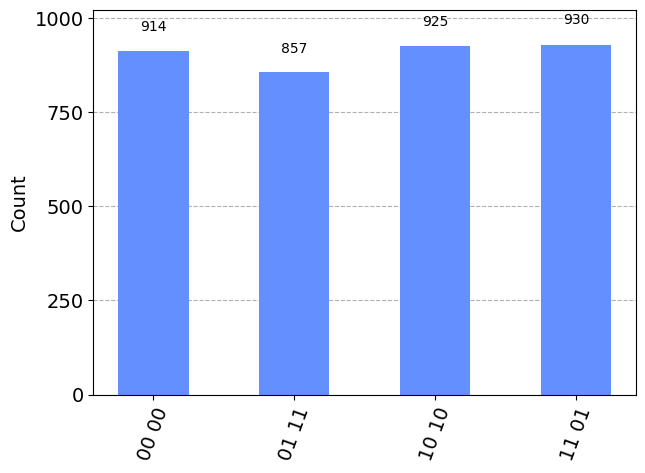

In [24]:
filtered_quantum_hist_a = plot_histogram(filtered_result_a)
filtered_quantum_hist_a.savefig('filtered_quantum_result_a.png')
filtered_quantum_hist_a

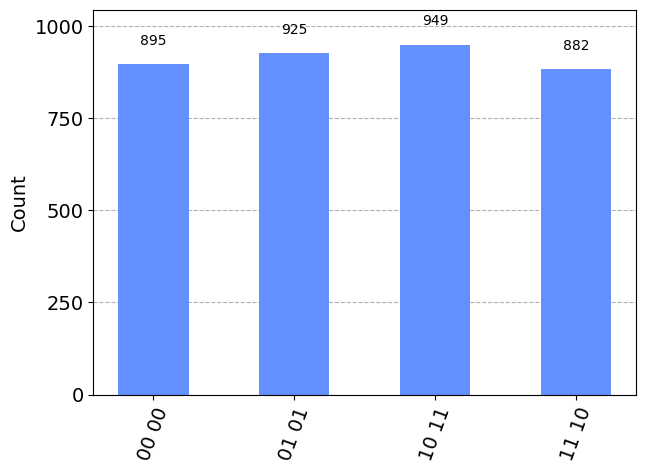

In [25]:
filtered_quantum_hist_b = plot_histogram(filtered_result_b)
filtered_quantum_hist_b.savefig('filtered_quantum_result_b.png')
filtered_quantum_hist_b